In [1]:
# Importando os módulos:
import pandas as pd
import folium
from folium import plugins, Map
import matplotlib.pyplot as plt
import collections
import datetime
import numpy as np
from API_google import reverse_geocode
import seaborn as sns
import csv 

In [3]:
# Leitura do arquivo base
df = pd.read_csv(r"dataset_v01.csv", delimiter=";")
df = df.rename(columns={'id': 'ID_USUARIO', 'dat_nsc': 'DATA_NASCIMENTO', 'renda': 'RENDA', 'renda_SPEC': 'RENDA_FIXA', 'latitude': 'LATITUDE', 'longitude': 'LONGITUDE', 'tipo_pessoa': 'TIPO_PESSOA'})

# Criando novas colunas CIDADE, ESTADO e LOGRADOURO
df['CIDADE'] = 'NaN'
df['ESTADO'] = 'NaN'
df['LOGRADOURO'] = 'NaN'

# Formatação das coordenadas, trocado as virgulas por ponto e removendo registros sem coordenadas
df['LATITUDE'] = df['LATITUDE'].str.replace(',','.')
df['LONGITUDE'] = df['LONGITUDE'].str.replace(',','.')
#df.dropna(subset=['LATITUDE'], inplace=True)

In [ ]:
# Utilização da API Google Maps para inserção dos dados regionais, "CIDADE" e "ESTADO"
for index, row in df.iterrows():
    try:
        result = reverse_geocode(row['LATITUDE'], row['LONGITUDE'])
        df.loc[index,'CIDADE'] = result[0]
        df.loc[index,'ESTADO'] = result[1]
        df.loc[index,'LOGRADOURO'] = result[2]
        df.loc[index,'TIPO_PESSOA'] = result[3]
    except:
        pass

In [9]:
df.head()

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,30/01/1981 00:00,"DE R$ 1.900,00 A R$ 3.800,00","3.104,00",-4.84758,-37.78439,CPF,Jaguaruana,Ceará,street_address
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,28/01/1978 00:00,"DE R$ 3.800,00 A R$ 7.600,00","5.703,00",-26.99011814,-48.63716523,CPF,Balneário Camboriú,Santa Catarina,street_address
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,09/12/1954 00:00,"DE R$ 3.800,00 A R$ 7.600,00","3.901,00",-5.053671016,-42.81315203,CPF,Teresina,Piauí,street_address
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,28/08/1975 00:00,"DE R$ 788,00 A R$ 1.140,00","1.086,00",-15.059042,-48.163372,CNPJ,Mimoso de Goiás,Goiás,establishment
4,0cef9719-0aa3-49a2-adea-9c09c04de071,17/06/1957 00:00,"DE R$ 788,00 A R$ 1.140,00",836,-17.694658,-42.52228,CPF,Capelinha,Minas Gerais,street_address


In [5]:
# Criando arquivo csv com os dados tratados(nao precisa rodar)
df.to_csv('dataset_v02.csv', sep=';', encoding='ANSI')

In [21]:
# Nova data frame com os dados tratados (rodar todas as vezes)
df_spc = pd.read_csv(r"dataset_v02.csv", delimiter=';', encoding='ANSI')

In [22]:
df_spc.head()

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,30/01/1981 00:00,"DE R$ 1.900,00 A R$ 3.800,00","3.104,00","-4,84758","-37,78439",CPF,Jaguaruana,Ceará,street_address
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,28/01/1978 00:00,"DE R$ 3.800,00 A R$ 7.600,00","5.703,00","-26,99011814","-48,63716523",CPF,Balneário Camboriú,Santa Catarina,street_address
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,09/12/1954 00:00,"DE R$ 3.800,00 A R$ 7.600,00","3.901,00","-5,053671016","-42,81315203",CPF,Teresina,Piauí,street_address
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,28/08/1975 00:00,"DE R$ 788,00 A R$ 1.140,00","1.086,00","-15,059042","-48,163372",CNPJ,Mimoso de Goiás,Goiás,establishment
4,0cef9719-0aa3-49a2-adea-9c09c04de071,17/06/1957 00:00,"DE R$ 788,00 A R$ 1.140,00",836,"-17,694658","-42,52228",CPF,Capelinha,Minas Gerais,street_address


In [4]:
df_spc.groupby('TIPO_PESSOA').count()

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,CIDADE,ESTADO,LOGRADOURO
TIPO_PESSOA,,,,,,,,,
CNPJ,1663,1653,1663,1663,1024,1024,1024,1024,1024
CPF,8337,8283,8337,8337,7719,7719,7719,7719,7719


In [23]:
# Seprando anos, mes e dia em colunas
df_spc['DATA_NASCIMENTO'] = pd.to_datetime(df_spc['DATA_NASCIMENTO'])
df_spc['ANO'], df_spc['MES'], df_spc['DIA'], df_spc['HORA']  = df_spc['DATA_NASCIMENTO'].apply(lambda x: x.year), df_spc['DATA_NASCIMENTO'].apply(lambda x: x.month), df_spc['DATA_NASCIMENTO'].apply(lambda x: x.day), df_spc['DATA_NASCIMENTO'].apply(lambda x: x.hour) 
df_spc

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO,ANO,MES,DIA,HORA
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00","3.104,00","-4,84758","-37,78439",CPF,Jaguaruana,Ceará,street_address,1981.0,1.0,30.0,0.0
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00","5.703,00","-26,99011814","-48,63716523",CPF,Balneário Camboriú,Santa Catarina,street_address,1978.0,1.0,28.0,0.0
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-09-12,"DE R$ 3.800,00 A R$ 7.600,00","3.901,00","-5,053671016","-42,81315203",CPF,Teresina,Piauí,street_address,1954.0,9.0,12.0,0.0
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28,"DE R$ 788,00 A R$ 1.140,00","1.086,00","-15,059042","-48,163372",CNPJ,Mimoso de Goiás,Goiás,establishment,1975.0,8.0,28.0,0.0
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17,"DE R$ 788,00 A R$ 1.140,00",836,"-17,694658","-42,52228",CPF,Capelinha,Minas Gerais,street_address,1957.0,6.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,f2261fce-83c5-4f64-b145-85f46bcf18b1,1979-08-10,"DE R$ 1.900,00 A R$ 3.800,00","2.776,00","-11,60937194","-47,04750645",CPF,Porto Alegre do Tocantins,Tocantins,route,1979.0,8.0,10.0,0.0
9996,bdaa7802-4650-44a4-93f7-952b72ec17a0,1980-04-30,"DE R$ 3.800,00 A R$ 7.600,00","4.099,00","-15,65049668","-47,79332059",CPF,Brasília,Distrito Federal,street_address,1980.0,4.0,30.0,0.0
9997,e7b37cd5-714a-44d8-ad7f-4ed3aa6b0695,1976-05-26,"DE R$ 788,00 A R$ 1.140,00","1.052,00","-8,330678649","-36,13689703",CPF,São Caetano,Pernambuco,street_address,1976.0,5.0,26.0,0.0
9998,167dbd7f-7ccd-4aad-a6b9-c3fb9d56c9cd,1985-06-11,"DE R$ 788,00 A R$ 1.140,00",958,NaN,NaN,CNPJ,NaN,NaN,NaN,1985.0,6.0,11.0,0.0


In [24]:
# Calculando a idade
df_spc['IDADE']  = df_spc['ANO'].apply(lambda x: 2021 - x)
df_spc.IDADE.dtypes

dtype('float64')

In [25]:
df_spc.IDADE.describe()

count    9936.000000
mean       52.988023
std        15.123420
min        20.000000
25%        43.000000
50%        48.000000
75%        60.000000
max       121.000000
Name: IDADE, dtype: float64

In [26]:
# Agrupando Faixa Etaria
df_spc['FAIXA ETARIA'] = pd.cut(df_spc['IDADE'],
        bins = (20, 30, 40, 50, 60, 70, 80),
        labels = ('20 a 30 anos', '30 a 40 anos', '40 a 50 anos', '50 a 60 anos', '60 a 70 anos', '80 mais'))
df_spc

,ID_USUARIO,DATA_NASCIMENTO,RENDA,RENDA_FIXA,LATITUDE,LONGITUDE,TIPO_PESSOA,CIDADE,ESTADO,LOGRADOURO,ANO,MES,DIA,HORA,IDADE,FAIXA ETARIA
0,d6c0cc1d-eb61-486a-b5c3-50725ef44d61,1981-01-30,"DE R$ 1.900,00 A R$ 3.800,00","3.104,00","-4,84758","-37,78439",CPF,Jaguaruana,Ceará,street_address,1981.0,1.0,30.0,0.0,40.0,30 a 40 anos
1,da0067e7-aa6b-4355-b373-ca17f6ac3b44,1978-01-28,"DE R$ 3.800,00 A R$ 7.600,00","5.703,00","-26,99011814","-48,63716523",CPF,Balneário Camboriú,Santa Catarina,street_address,1978.0,1.0,28.0,0.0,43.0,40 a 50 anos
2,2d729b8a-d53c-48e7-8bf5-33b021980c04,1954-09-12,"DE R$ 3.800,00 A R$ 7.600,00","3.901,00","-5,053671016","-42,81315203",CPF,Teresina,Piauí,street_address,1954.0,9.0,12.0,0.0,67.0,60 a 70 anos
3,62c0f1e6-36f2-4205-a134-232a58a6f8a5,1975-08-28,"DE R$ 788,00 A R$ 1.140,00","1.086,00","-15,059042","-48,163372",CNPJ,Mimoso de Goiás,Goiás,establishment,1975.0,8.0,28.0,0.0,46.0,40 a 50 anos
4,0cef9719-0aa3-49a2-adea-9c09c04de071,1957-06-17,"DE R$ 788,00 A R$ 1.140,00",836,"-17,694658","-42,52228",CPF,Capelinha,Minas Gerais,street_address,1957.0,6.0,17.0,0.0,64.0,60 a 70 anos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,f2261fce-83c5-4f64-b145-85f46bcf18b1,1979-08-10,"DE R$ 1.900,00 A R$ 3.800,00","2.776,00","-11,60937194","-47,04750645",CPF,Porto Alegre do Tocantins,Tocantins,route,1979.0,8.0,10.0,0.0,42.0,40 a 50 anos
9996,bdaa7802-4650-44a4-93f7-952b72ec17a0,1980-04-30,"DE R$ 3.800,00 A R$ 7.600,00","4.099,00","-15,65049668","-47,79332059",CPF,Brasília,Distrito Federal,street_address,1980.0,4.0,30.0,0.0,41.0,40 a 50 anos
9997,e7b37cd5-714a-44d8-ad7f-4ed3aa6b0695,1976-05-26,"DE R$ 788,00 A R$ 1.140,00","1.052,00","-8,330678649","-36,13689703",CPF,São Caetano,Pernambuco,street_address,1976.0,5.0,26.0,0.0,45.0,40 a 50 anos
9998,167dbd7f-7ccd-4aad-a6b9-c3fb9d56c9cd,1985-06-11,"DE R$ 788,00 A R$ 1.140,00",958,NaN,NaN,CNPJ,NaN,NaN,NaN,1985.0,6.0,11.0,0.0,36.0,30 a 40 anos


In [27]:
#Agrupamento por tipo de pessoas
df_CPF= df_spc[df_spc['TIPO_PESSOA'] == 'CPF']
df_CNPJ= df_spc[df_spc['TIPO_PESSOA'] == 'CNPJ']

In [28]:
df_CPF.TIPO_PESSOA.describe()

count     8337
unique       1
top        CPF
freq      8337
Name: TIPO_PESSOA, dtype: object

In [29]:
df_CNPJ.TIPO_PESSOA.describe()

count     1663
unique       1
top       CNPJ
freq      1663
Name: TIPO_PESSOA, dtype: object

In [30]:
#Agrupamento por Renda de pessoa fisica
group_CPF = df_CPF.groupby(['RENDA'])['ID_USUARIO'].count()
group_CPF

RENDA
DE R$ 1.900,00 A R$ 3.800,00    4039
DE R$ 3.800,00 A R$ 7.600,00    1660
DE R$ 788,00 A R$ 1.140,00      2575
MAIOR QUE R$ 7.600,00             63
Name: ID_USUARIO, dtype: int64

In [31]:
#Agrupamento por Renda de pessoa juridica
group_CNPJ = df_CNPJ.groupby(['RENDA'])['ID_USUARIO'].count()
group_CNPJ

RENDA
DE R$ 1.900,00 A R$ 3.800,00    723
DE R$ 3.800,00 A R$ 7.600,00    302
DE R$ 788,00 A R$ 1.140,00      622
MAIOR QUE R$ 7.600,00            16
Name: ID_USUARIO, dtype: int64

In [32]:
df_spc.dtypes

ID_USUARIO                 object
DATA_NASCIMENTO    datetime64[ns]
RENDA                      object
RENDA_FIXA                 object
LATITUDE                   object
LONGITUDE                  object
TIPO_PESSOA                object
CIDADE                     object
ESTADO                     object
LOGRADOURO                 object
ANO                       float64
MES                       float64
DIA                       float64
HORA                      float64
IDADE                     float64
FAIXA ETARIA             category
dtype: object

In [33]:
latitudes = []
longitudes = []
#open the file and extract the data
with open("dataset_v02.csv", 'rt', ) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';')
    for row in reader:
        print(row)
        latitudes.append(float(row["LATITUDE"].replace(',','.') if row["LATITUDE"] else 0.0))
        longitudes.append(float(row["LONGITUDE"].replace(',','.') if row["LONGITUDE"] else 0.0))

: 'NaN'}
{'ID_USUARIO': '939c23e0-60b9-44ed-958c-6673c9813925', 'DATA_NASCIMENTO': '15/03/1971 00:00', 'RENDA': 'DE R$ 788,00 A R$ 1.140,00', 'RENDA_FIXA': '985', 'LATITUDE': '-12,98216', 'LONGITUDE': '-38,45463', 'TIPO_PESSOA': 'CNPJ', 'CIDADE': 'Salvador', 'ESTADO': 'Bahia', 'LOGRADOURO': 'establishment'}
{'ID_USUARIO': '9440be2c-6a9a-4237-88ef-661168be0a4c', 'DATA_NASCIMENTO': '01/04/1974 00:00', 'RENDA': 'DE R$ 3.800,00 A R$ 7.600,00', 'RENDA_FIXA': '6.920,00', 'LATITUDE': '-30,02078', 'LONGITUDE': '-51,16748', 'TIPO_PESSOA': 'CPF', 'CIDADE': 'Porto Alegre', 'ESTADO': 'Rio Grande do Sul', 'LOGRADOURO': 'street_address'}
{'ID_USUARIO': 'a092d7c3-0b5f-4bfd-aea1-f8589215a500', 'DATA_NASCIMENTO': '27/12/1980 00:00', 'RENDA': 'DE R$ 1.900,00 A R$ 3.800,00', 'RENDA_FIXA': '3.498,00', 'LATITUDE': '-16,40154722', 'LONGITUDE': '-50,36594668', 'TIPO_PESSOA': 'CPF', 'CIDADE': 'São Luís de Montes Belos', 'ESTADO': 'Goiás', 'LOGRADOURO': 'route'}
{'ID_USUARIO': '646fcc2b-a333-4075-806c-36914969

In [34]:
#Padronização dos dados
df_spc['LONGITUDE'] = df_spc['LONGITUDE'].replace('.','')
df_spc['LATITUDE'] = df_spc['LATITUDE'].replace('.','')
df_spc['LONGITUDE'] = df_spc['LONGITUDE'].replace(r'\s+', np.nan, regex=True)
df_spc['LONGITUDE'] = df_spc['LONGITUDE'].replace(r'^$', np.nan, regex=True)
df_spc['LONGITUDE'] = df_spc['LONGITUDE'].fillna(-0.99999)
df_spc['LONGITUDE'] = pd.to_numeric(df_spc['LONGITUDE']
df_spc['LATITUDE'] = df_spc['LATITUDE'].replace(r'\s+', np.nan, regex=True)
df_spc['LATITUDE'] = df_spc['LATITUDE'].replace(r'^$', np.nan, regex=True)
df_spc['LATITUDE'] = df_spc['LATITUDE'].fillna(-0.99999)
df_spc['LATITUDE'] = pd.to_numeric(df_spc['LATITUDE'])

SyntaxError: invalid syntax (<ipython-input-34-f48ba6081401>, line 8)

In [26]:
reader

In [44]:
df_spc['LATITUDE'] = df_spc['LATITUDE'].astype(float)
df_spc['LONGITUDE'] = df_spc['LONGITUDE'].astype(float)

ValueError: could not convert string to float: '-2.699.011.814'

<AxesSubplot:>

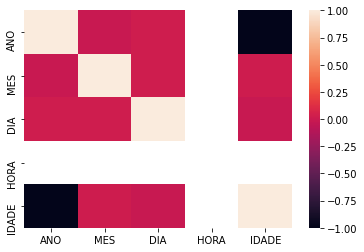

In [35]:
sns.heatmap(df_spc.corr())

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [39]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['RENDA'].unique())
df_spc['RENDA'] = state_encoder.transform(df_spc['RENDA'])
df_spc['RENDA'].unique()

array([0, 1, 2, 3])

In [40]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['CIDADE'].unique())
df_spc['CIDADE'] = state_encoder.transform(df_spc['CIDADE'])
df_spc['CIDADE'].unique()

array([ 993,  160, 1996, ..., 2017, 1851, 1551])

In [41]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['ESTADO'].unique())
df_spc['ESTADO'] = state_encoder.transform(df_spc['ESTADO'])
df_spc['ESTADO'].unique()

array([ 5, 23, 17,  8, 12,  9, 29,  4, 16, 19, 15, 28, 20, 13, 30, 10, 11,
       14,  1,  3, 21, 22,  0,  6,  7, 24, 18,  2, 26, 27, 25])

In [ ]:
state_encoder = LabelEncoder()
state_encoder.fit(df_spc['TIPO_PESSOA'].unique())
df_spc['TIPO_PESSOA'] = state_encoder.transform(df_spc['TIPO_PESSOA'])
df_spc['TIPO_PESSOA'].unique()

In [42]:
X = df_spc[['RENDA', 'CIDADE', 'ESTADO']]
X.shape

(10000, 3)

In [53]:
# Y = f(X)
Y = df_spc['TIPO_PESSOA']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [49]:
x_train.shape

(6700, 3)

In [50]:
x_test.shape

(3300, 3)

In [51]:
y_train.shape

(6700,)

In [52]:
y_test.shape

(3300,)

In [58]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [55]:
np.unique(y_test)

array(['CNPJ', 'CPF'], dtype=object)

In [56]:
kmeans = KMeans(n_clusters=2, random_state=0)
yk_train = kmeans.fit_predict(x_train)
yk_test = kmeans.predict(x_test)

In [57]:
kmeans.score(x_test, yk_test)

-313692689.17850286

In [59]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,yk_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

KNeighborsClassifier(n_neighbors=3)

In [61]:
model.score(x_test, yk_test)

0.9996969696969698